<a href="https://colab.research.google.com/github/sahilbaishya/HandsOnML/blob/main/Nerual_Nets_With_Keras_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import sklearn
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Image Classifier using Sequential API - Fashion MNIST Dataset

## Data Fetching and Exploration

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data();

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_test.shape

(10000, 28, 28)

## Splitting And Modeling

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


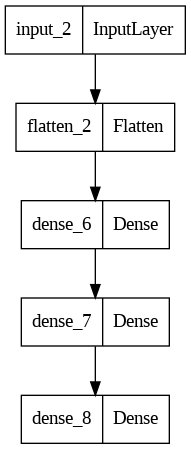

In [ ]:
keras.utils.plot_model(model)

## Data Visualization

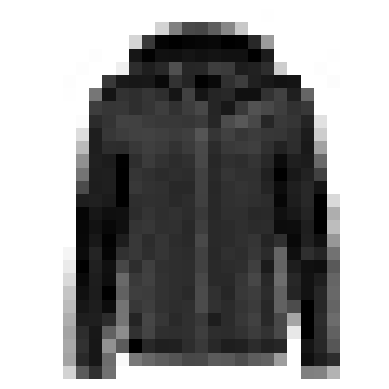

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

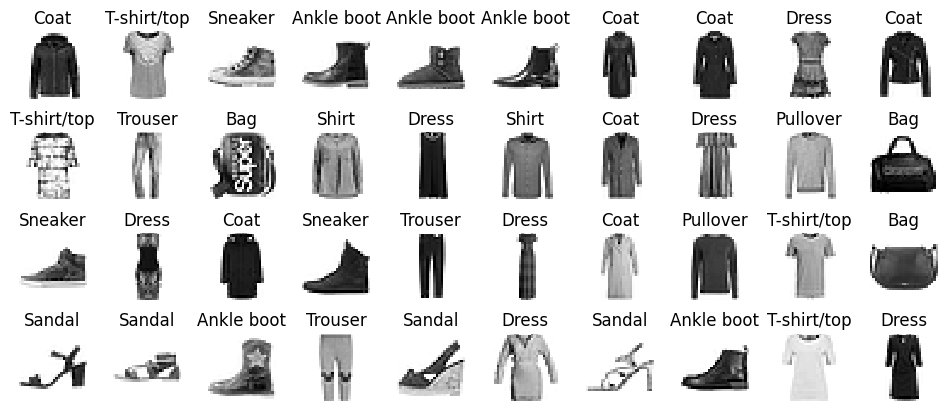

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig('fashion_mnist_plot', bbox_inches='tight',pad_inches = 0)
plt.show()

## Model Exploration

In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.02990349,  0.05827282, -0.02092052, ..., -0.05104995,
        -0.07434578,  0.05945683],
       [-0.00191113, -0.03124353,  0.02220841, ...,  0.02447228,
        -0.05791511, -0.02658936],
       [-0.02238953,  0.02692883, -0.03345549, ...,  0.04058912,
         0.04323054,  0.06050012],
       ...,
       [ 0.06265531, -0.07033701,  0.01866373, ...,  0.069178  ,
         0.02567063, -0.04929389],
       [ 0.01740763, -0.07282826, -0.04388764, ...,  0.04261523,
         0.0523876 , -0.07228097],
       [-0.0728607 , -0.05431702,  0.04655582, ..., -0.0176799 ,
         0.05407988, -0.01401411]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
hidden2 = model.layers[2]
w2, b2 = hidden2.get_weights()

In [ ]:
w2.shape

(300, 100)

In [ ]:
b2.shape

(100,)

## Compilation and Training

In [ ]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7056 - accuracy: 0.7694 - val_loss: 0.5275 - val_accuracy: 0.8166
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4832 - accuracy: 0.8311 - val_loss: 0.4429 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4390 - accuracy: 0.8455 - val_loss: 0.4451 - val_accuracy: 0.8464
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4131 - accuracy: 0.8554 - val_loss: 0.4074 - val_accuracy: 0.8590
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3932 - accuracy: 0.8622 - val_loss: 0.3813 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3773 - accuracy: 0.8667 - val_loss: 0.3642 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3647 - accuracy: 0.8719 - val_loss: 0.3800 - val_accuracy:

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
history.epoch

In [ ]:
history.history

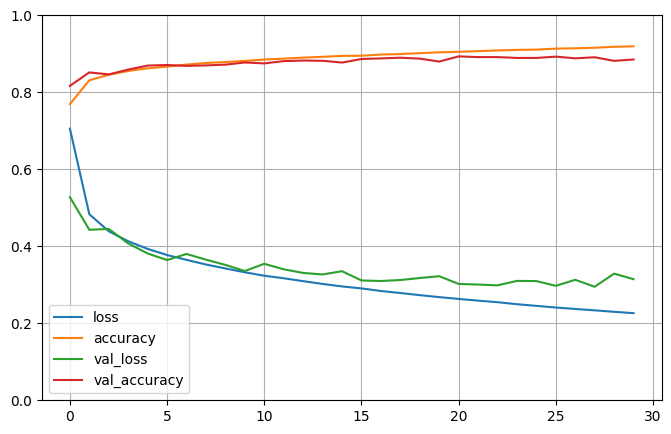

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 57.7951 - accuracy: 0.8570


[57.7950553894043, 0.8569999933242798]

In [ ]:
X_new = X_test[:3]

In [ ]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 23ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
pred_classes = np.argmax(y_proba, axis =1)
pred_classes

array([9, 2, 1])

In [ ]:
np.array(class_names)[pred_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Regression MLP using Sequential API

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                270       
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                270       
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7808 - accuracy: 0.0024 - val_loss: 0.5433 - val_accuracy: 0.0041
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5204 - accuracy: 0.0027 - val_loss: 0.4329 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.0028 - val_loss: 0.3861 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4037 - accuracy: 0.0028 - val_loss: 0.3630 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3839 - accuracy: 0.0028 - val_loss: 0.3496 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.0028 - val_loss: 0.3405 - val_accuracy: 0.0044
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3634 - accuracy: 0.0028 - val_loss: 0.3343 - val_accuracy: 0.0044
Epoch 

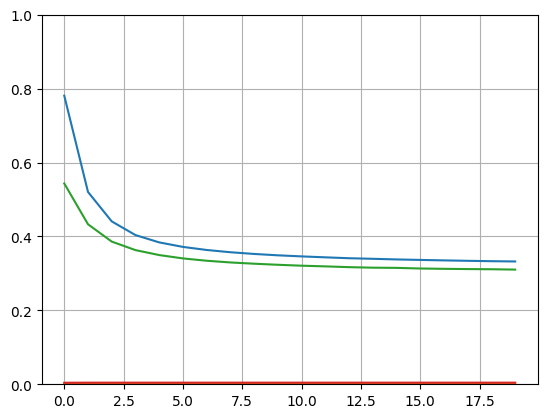

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.0021


In [ ]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 64ms/step


In [ ]:
y_pred

array([[0.82912 ],
       [1.400498],
       [4.727424]], dtype=float32)